---
---

## DHS2019 DATA EXPLORATION PART 1

---
---


#### PROBLEM STATEMENT

An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. Given the tag of the question, number of views received, number of answers, username and reputation of the question author, the problem requires you to predict the upvote count that the question will receive. 

___

#### DATA DICTIONARY

|**Variable** | **Definition** |
|---|---|
| **ID** | Question ID |
| **Tag** | Anonymised tags representing question category |
| **Reputation** |	Reputation score of question author |
| **Answers** |	Number of times question has been answered |
| **Username** |	Anonymised user id of question author |
| **Views** |	Number of times question has been viewed |
| **Upvotes** |	(Target) Number of upvotes for the question |

---

***Dataset URL: https://datahack.analyticsvidhya.com/contest/workshop_enigma-codefest-machine-learning/***


In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 100

In [2]:
# read the train dataset 
train_df = pd.read_csv("dataset/upvote_count/train_NIR5Yl1.csv")
print(train_df.shape)
train_df.head()

(330045, 7)


,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [3]:
# read the test dataset
test_df = pd.read_csv("dataset/upvote_count/test_8i3B3FC.csv")
print(test_df.shape)
test_df.head()

(141448, 6)


,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


---

#### Explore the Target Variable

---

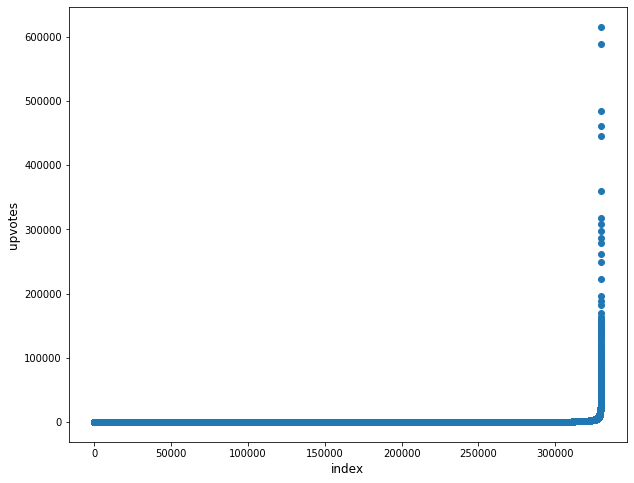

In [4]:
### EXERCISE-1
## Create a scatter plot and histogram plot to visualize the target ##
## ##
plt.figure(figsize=(10,8))
plt.scatter(range(train_df.shape[0]), np.sort(train_df["Upvotes"].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('upvotes', fontsize=12)
plt.show()

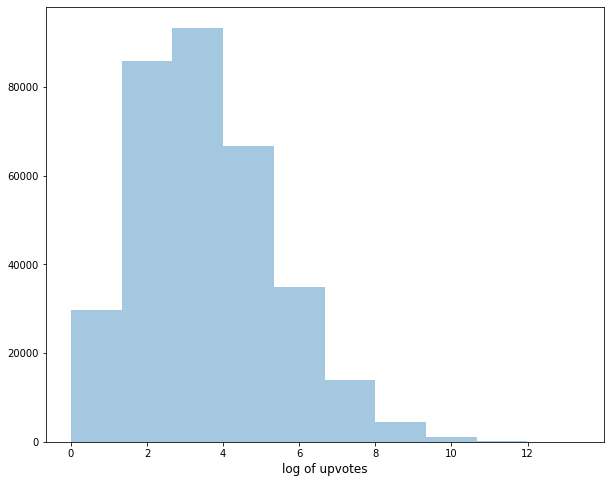

In [5]:
plt.figure(figsize=(10,8))
sns.distplot(np.log1p(train_df["Upvotes"].values), bins=10, kde=False)
plt.xlabel('log of upvotes', fontsize=12)
plt.show()

---

#### Correlation of the target with Numerical variables

---

In [6]:
### EXERCISE-2
### create a correlation matrix of the target variable with the numerical variables
corrmat = train_df[['Reputation', 'Answers', 'Views', 'Upvotes']].corr()
corrmat

,Reputation,Answers,Views,Upvotes
Reputation,1.000000,0.066504,0.036455,0.266710
Answers,0.066504,1.000000,0.498642,0.202033
Views,0.036455,0.498642,1.000000,0.437336
Upvotes,0.266710,0.202033,0.437336,1.000000


(4.0, 0.0)

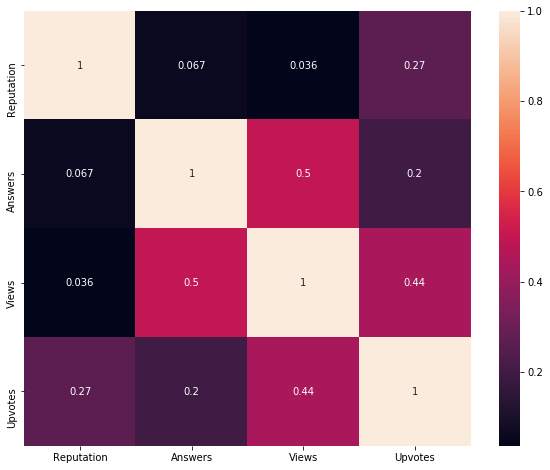

In [7]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(corrmat, annot=True, );
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Categorical Variable Exploration

Create a bar plot and check the number of rows for each category of 'Tag'

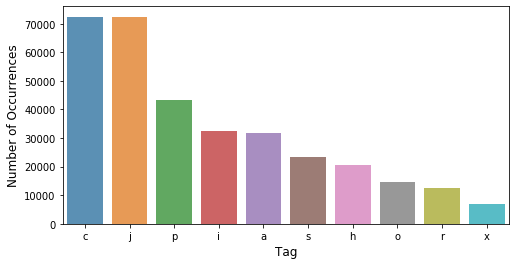

In [8]:
### EXERCISE-3
# on train data
cnt_srs = train_df['Tag'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tag', fontsize=12)
plt.show()

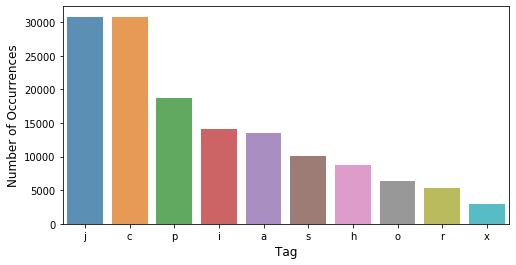

In [9]:
# on test data
cnt_srs = test_df['Tag'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tag', fontsize=12)
plt.show()

In [10]:
### EXERCISE-4
## Sort the train df by number of upvotes

## Once sorted, show the top 30 rows for the following columns : Reputation, Answers, Views, Upvotes

train_df.sort_values(["Upvotes"], ascending=False)[['Reputation', 'Answers', 'Views', 'Upvotes']].head(10)

,Reputation,Answers,Views,Upvotes
86457,491244.0,39.0,1815987.0,615278.0
323367,361277.0,20.0,1011323.0,588966.0
43972,287981.0,21.0,1225923.0,483995.0
37080,518066.0,32.0,1068171.0,460447.0
55806,90911.0,29.0,4417626.0,445709.0
18636,163511.0,20.0,1331067.0,360073.0
206485,287981.0,21.0,1225935.0,317555.0
164943,518091.0,19.0,380058.0,308308.0
303013,91541.0,41.0,2447579.0,296862.0
146919,89433.0,14.0,2662604.0,286529.0


In [11]:
### EXERCISE-5
## Try sorting the dataset by different numerical columns and see the results
## Do you see any patterns in the data on how the upvotes are affected?

train_df.sort_values(["Views"], ascending=False)[['Reputation', 'Answers', 'Views', 'Upvotes']].head(10)

,Reputation,Answers,Views,Upvotes
98585,15272.0,32.0,5231058.0,144203.0
132439,48827.0,59.0,5004985.0,261157.0
168266,33705.0,66.0,4858537.0,153559.0
55806,90911.0,29.0,4417626.0,445709.0
251016,8774.0,19.0,3711920.0,29972.0
80083,8769.0,19.0,3711657.0,30271.0
281483,16203.0,27.0,3384984.0,48707.0
13514,19710.0,26.0,3328047.0,49840.0
145770,19710.0,26.0,3327855.0,29406.0
169813,7766.0,20.0,3146786.0,31249.0


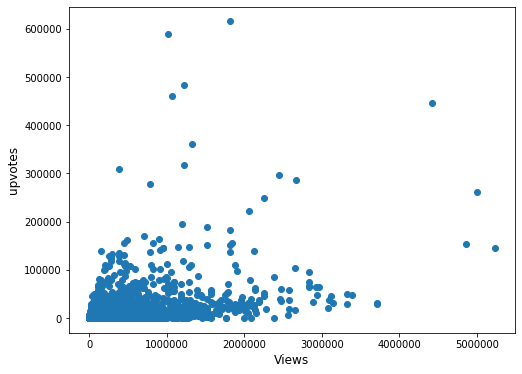

In [12]:
## If the naked eyes are not very helpful, try some scatter plots
plt.figure(figsize=(8,6))
plt.scatter(train_df["Views"], train_df["Upvotes"])
plt.xlabel('Views', fontsize=12)
plt.ylabel('upvotes', fontsize=12)
plt.show()

---

#### ### Check the categorical distribution between train and test

---

In [13]:
### EXERCISE-6
## Check whether there are any common usernames between train and test


train_df['Username'].nunique()

141802

In [14]:
test_df["Username"].nunique()

79351

In [15]:
len(set(test_df["Username"].unique()).intersection(set(train_df["Username"].unique())))

45414

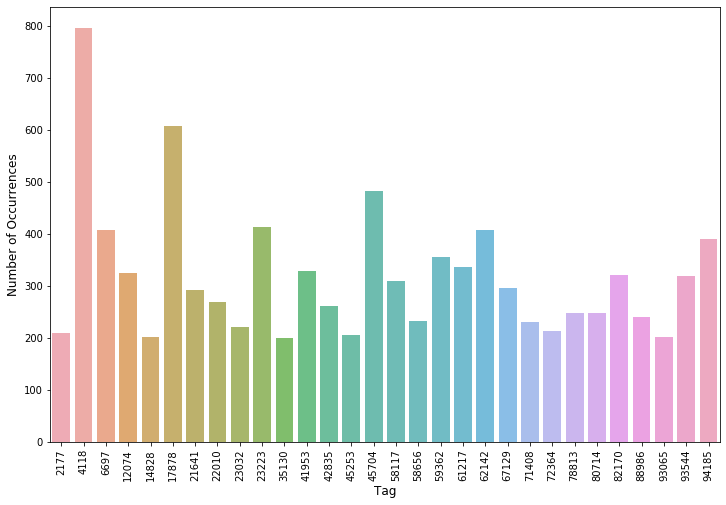

In [16]:
### EXERCISE-7
# ## Do a bar plot like of top 30 usernames (occured most) and have a look for train and test

## on train data
cnt_srs = train_df['Username'].value_counts().head(30)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tag', fontsize=12)
plt.xticks(rotation=90)
plt.show()

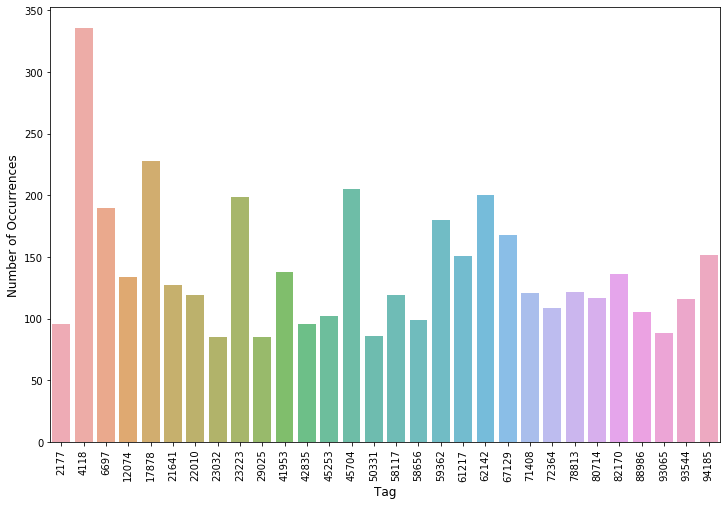

In [17]:
## on test data 
cnt_srs = test_df['Username'].value_counts().head(30)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tag', fontsize=12)
plt.xticks(rotation=90)
plt.show()